<a href="https://colab.research.google.com/github/Asigen93/deteksiayam_yolov8_and_deepsort/blob/main/tes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# jalankan di Colab cell (prefix !)
!pip install -U pip
!pip install ultralytics roboflow opencv-python-headless matplotlib tqdm pandas
# TensorFlow dibutuhkan untuk export/validasi TFLite
!pip install -U "tensorflow>=2.11.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 71.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 132.0 MB/s  0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [ultralytics]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="QCBJE7OWX11d9DtDoY3y")  # paste API key Anda
# Ganti workspace/project/version sesuai Roboflow Anda:
# Anda bisa dapatkan nama project & versi dari URL Roboflow atau dari dashboard
project = rf.workspace().project("ayam-z1u5r-loss8")  # jika error, lihat catatan di bawah
dataset = project.version(2).download("yolov8")  # pilihan export: "yolov8" atau "yolov5"
print("Dataset downloaded to:", dataset.location)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ayam-2 in yolov8:: 100%|██████████| 299/299 [00:00<00:00, 3716.12it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dataset downloaded to: /content/ayam-2


In [3]:
import os
# sesuaikan path kalau Anda pakai dataset.location dari SDK, contohnya:
dataset_path = "/content/ayam-2"   # ganti sesuai lokasi unzip / dataset.location
# kalau pakai SDK: dataset_path = dataset.location

for root, dirs, files in os.walk(dataset_path):
    print(root, "->", len([f for f in files if f.endswith(('.jpg','.png'))]), "images")
    # break supaya tidak print semua
    break

# Jika Roboflow sudah menyertakan data.yaml, gunakan itu.
!sed -n '1,200p' {dataset_path}/data.yaml

/content/ayam-2 -> 0 images
names:
- broiler
nc: 1
roboflow:
  license: CC BY 4.0
  project: ayam-z1u5r-loss8
  url: https://universe.roboflow.com/tirtarcs/ayam-z1u5r-loss8/dataset/2
  version: 2
  workspace: tirtarcs
test: ../test/images
train: ../train/images
val: ../valid/images


In [4]:
print(dataset.location)


/content/ayam-2


In [5]:
from ultralytics import YOLO

# Pilih backbone: 'yolov8n.pt' (nano) cepat & ringan untuk edge/Android,
# atau 'yolov8s.pt'/'yolov8m.pt' untuk trade-off akurasi/kecepatan.
pretrained = 'yolov8n.pt'

model = YOLO(pretrained)

# TRAIN: sesuaikan epochs / batch / imgsz sesuai resource GPU Anda
model.train(data='/content/ayam-2/data.yaml', epochs=50, imgsz=640, batch=16, project='runs', name='chick_yolov8n')
# hasil weights terbaik ada di runs/chick_yolov8n/weights/best.pt

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ayam-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=chick_yolov8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d5b01bc75f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
# Validasi
results = model.val(data="/content/ayam-2/data.yaml")
print(results)

# Prediksi contoh gambar di val/images
model.predict(
    source="/content/ayam-2/valid/images",
    save=True,
    conf=0.25,
    imgsz=640
)

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2529.5±1065.6 MB/s, size: 201.7 KB)
val: Scanning /content/ayam-2/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 12/12 15.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 2.0it/s 0.5s
                   all         12        672      0.771      0.888      0.879      0.677
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to /content/runs/chick_yolov8n3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d5afe6de6c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'broiler'}
 obb: None
 orig_img: array([[[107, 115, 114],
         [105, 113, 112],
         [ 96, 104, 103],
         ...,
         [ 95, 107, 111],
         [ 74,  86,  90],
         [ 54,  66,  70]],
 
        [[107, 115, 114],
         [107, 115, 114],
         [100, 108, 107],
         ...,
         [117, 129, 133],
         [110, 122, 126],
         [ 91, 103, 107]],
 
        [[105, 113, 112],
         [107, 115, 114],
         [106, 114, 113],
         ...,
         [114, 126, 130],
         [112, 124, 128],
         [102, 114, 118]],
 
        ...,
 
        [[ 77,  77,  77],
         [ 80,  80,  80],
         [ 88,  86,  86],
         ...,
         [ 41,  54,  62],
         [ 42,  55,  63],
         [ 41,  54,  62]],
 
        [[ 70,  68,  68],
         [ 74,  72,  72],
         [ 79,  77,  77],
         ...,
         [ 40,  5

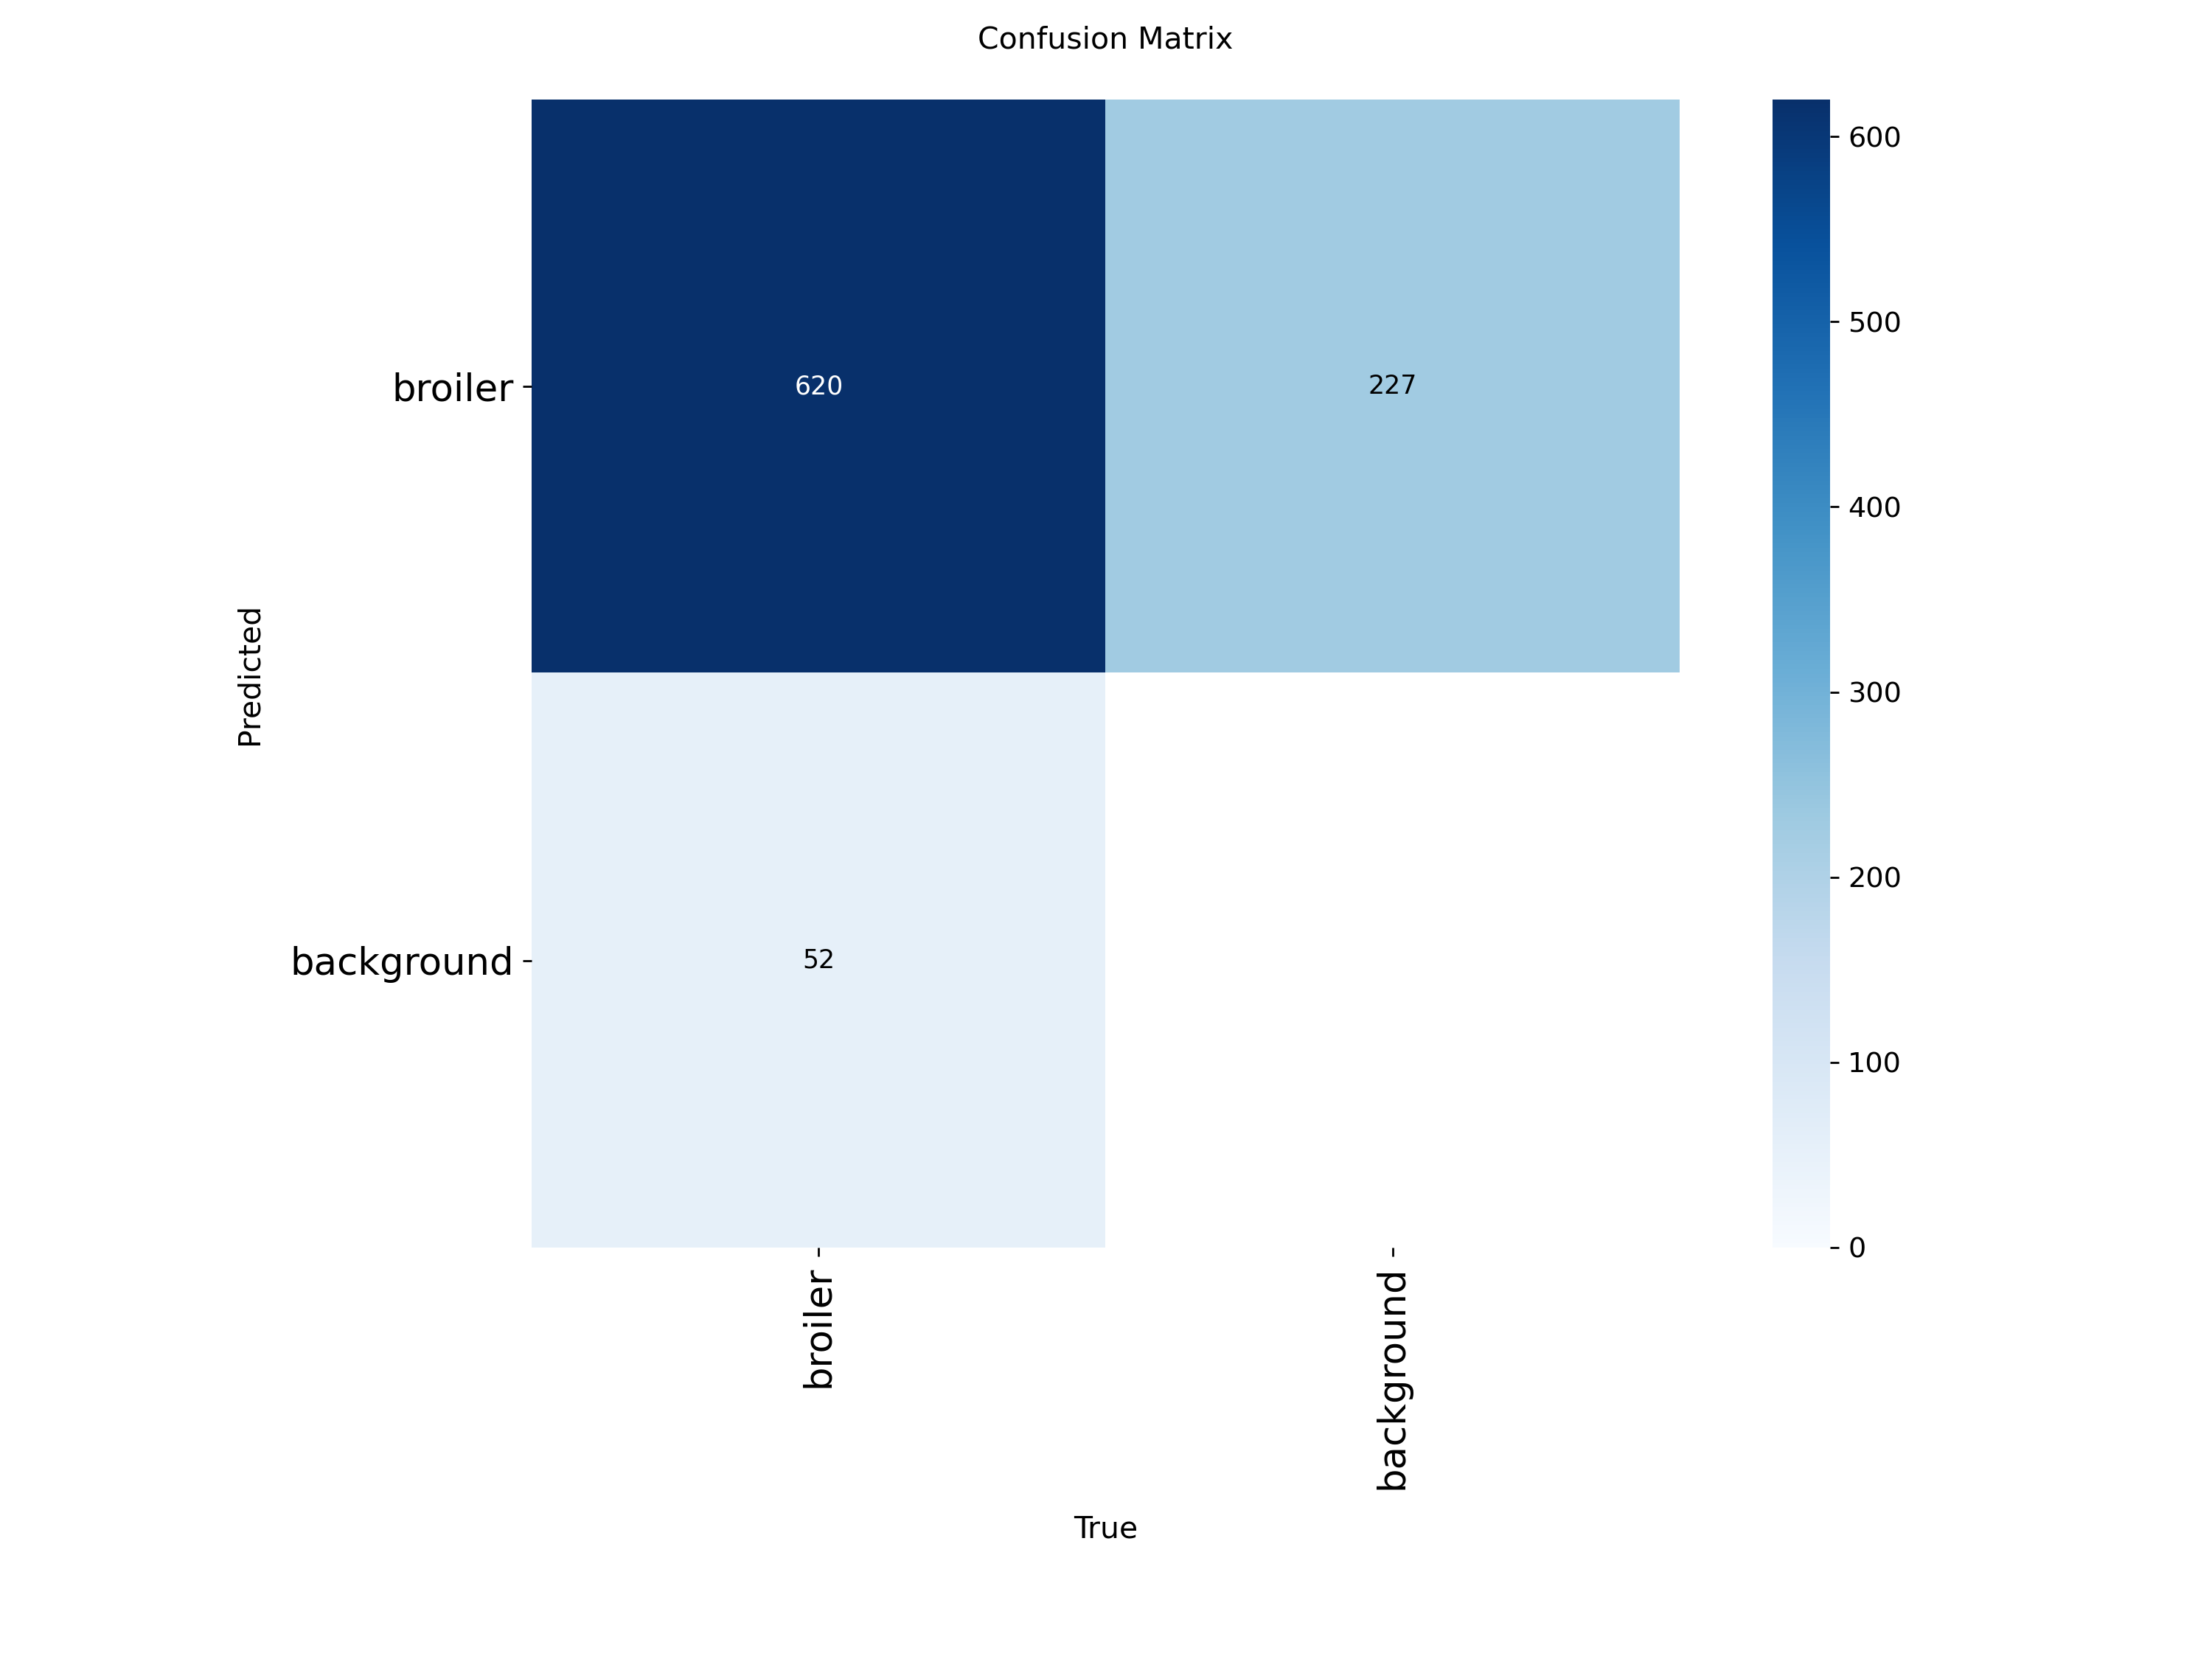

In [14]:
from IPython.display import Image, display

# Tampilkan confusion matrix
display(Image(filename="/content/runs/chick_yolov8n/confusion_matrix.png"))

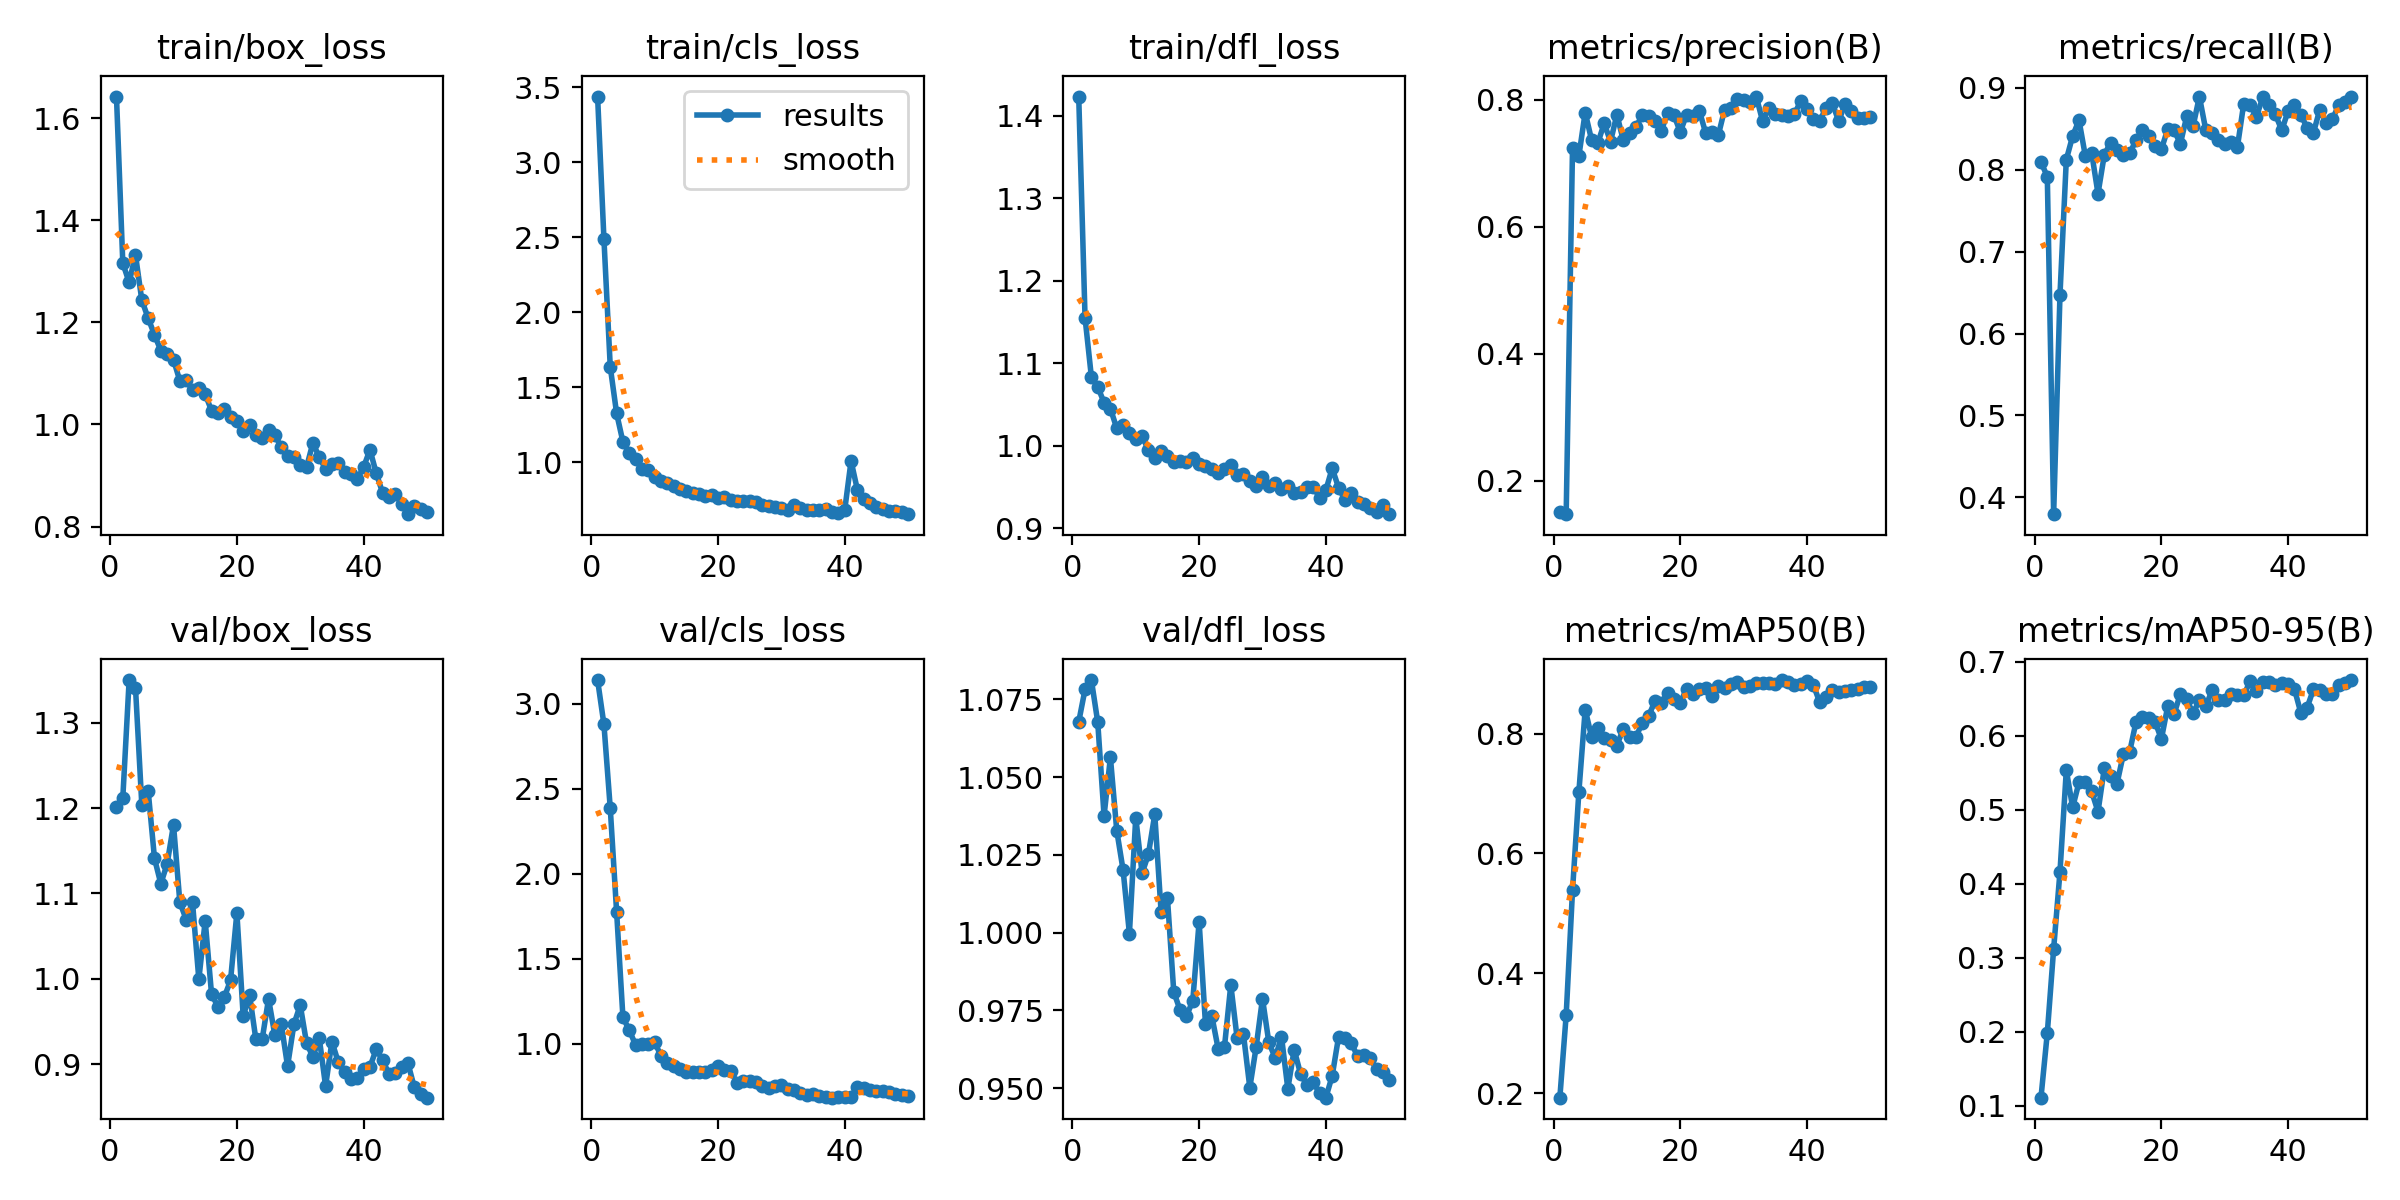

In [15]:
from IPython.display import Image, display

# Tampilkan confusion matrix
display(Image(filename="/content/runs/chick_yolov8n/results.png"))

In [16]:
# copy-paste ini di Colab cell untuk inference + counting video
import cv2, numpy as np, os
from ultralytics import YOLO
from collections import OrderedDict

# --- CentroidTracker (sederhana) ---
class CentroidTracker:
    def __init__(self, max_disappeared=30, max_distance=50):
        self.nextObjectID = 0
        self.objects = OrderedDict()
        self.disappeared = OrderedDict()
        self.max_disappeared = max_disappeared
        self.max_distance = max_distance
        self.counted_ids = set()
        self.history = {}  # history centroids per id

    def register(self, centroid):
        self.objects[self.nextObjectID] = centroid
        self.disappeared[self.nextObjectID] = 0
        self.history[self.nextObjectID] = [centroid]
        self.nextObjectID += 1

    def deregister(self, objectID):
        if objectID in self.objects: del self.objects[objectID]
        if objectID in self.disappeared: del self.disappeared[objectID]
        if objectID in self.history: del self.history[objectID]

    def update(self, rects):
        if len(rects) == 0:
            for objID in list(self.disappeared.keys()):
                self.disappeared[objID] += 1
                if self.disappeared[objID] > self.max_disappeared:
                    self.deregister(objID)
            return self.objects

        input_centroids = np.zeros((len(rects), 2), dtype="int")
        for (i, (x1,y1,x2,y2)) in enumerate(rects):
            input_centroids[i] = (int((x1+x2)/2.0), int((y1+y2)/2.0))

        if len(self.objects) == 0:
            for i in range(len(input_centroids)):
                self.register(input_centroids[i])
        else:
            objectIDs = list(self.objects.keys())
            objectCentroids = list(self.objects.values())
            D = np.linalg.norm(np.array(objectCentroids)[:, np.newaxis] - input_centroids[np.newaxis, :], axis=2)
            rows = D.min(axis=1).argsort()
            cols = D.argmin(axis=1)[rows]
            usedRows, usedCols = set(), set()
            for (row, col) in zip(rows, cols):
                if row in usedRows or col in usedCols: continue
                if D[row, col] > self.max_distance: continue
                objectID = objectIDs[row]
                self.objects[objectID] = input_centroids[col]
                self.disappeared[objectID] = 0
                self.history[objectID].append(tuple(input_centroids[col]))
                usedRows.add(row); usedCols.add(col)
            unusedRows = set(range(0, D.shape[0])).difference(usedRows)
            unusedCols = set(range(0, D.shape[1])).difference(usedCols)
            for row in unusedRows:
                objectID = objectIDs[row]
                self.disappeared[objectID] += 1
                if self.disappeared[objectID] > self.max_disappeared:
                    self.deregister(objectID)
            for col in unusedCols:
                self.register(input_centroids[col])
        return self.objects

# --- inference + counting function ---
def infer_and_count_video(video_path, weight_path, labels=['ayam'], out_video='out_count.mp4', conf_thres=0.25, iou_thres=0.45):
    model = YOLO(weight_path)
    cap = cv2.VideoCapture(video_path)
    w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS) or 25
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(out_video, fourcc, fps, (w,h))

    tracker = CentroidTracker(max_disappeared=30, max_distance=60)
    total_count = 0

    # contoh line untuk line-crossing (horizontal)
    line_y = int(h * 0.5)

    while True:
        ret, frame = cap.read()
        if not ret: break

        results = model.predict(frame, imgsz=640, conf=conf_thres, iou=iou_thres, verbose=False)[0]
        boxes = []
        classes = []
        confs = []
        for r in results.boxes:
            cls = int(r.cls.cpu().numpy()[0]) if hasattr(r,'cls') else int(r.cls)
            conf = float(r.conf.cpu().numpy()[0]) if hasattr(r,'conf') else float(r.conf)
            x1,y1,x2,y2 = r.xyxy[0].cpu().numpy()
            boxes.append([int(x1),int(y1),int(x2),int(y2)])
            classes.append(labels[cls] if cls < len(labels) else str(cls))
            confs.append(conf)

        tracked = tracker.update(boxes)

        # mapping each box to nearest tracked ID
        object_ids = []
        centroids_list = [((b[0]+b[2])//2, (b[1]+b[3])//2) for b in boxes]
        for c in centroids_list:
            min_id = None; min_dist = None
            for oid, ocent in tracked.items():
                d = np.linalg.norm(np.array(ocent) - np.array(c))
                if min_dist is None or d < min_dist:
                    min_dist = d; min_id = oid
            object_ids.append(min_id)

        # line-crossing counting logic
        for idx, oid in enumerate(object_ids):
            if oid is None: continue
            prev = tracker.history.get(oid, [])
            if len(prev) >= 2:
                prev_y = prev[-2][1]
                curr_y = prev[-1][1]
                # count only if it moves from above line to below line
                if prev_y < line_y and curr_y >= line_y and oid not in tracker.counted_ids:
                    tracker.counted_ids.add(oid)
                    total_count += 1

        # draw boxes & display ID
        for i,box in enumerate(boxes):
            x1,y1,x2,y2 = box
            cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0), 2)
            txt = f"{classes[i]} {confs[i]:.2f} ID:{object_ids[i]}"
            cv2.putText(frame, txt, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
        cv2.line(frame, (0,line_y), (w,line_y), (255,0,0), 2)
        cv2.putText(frame, f"Total count: {total_count}", (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
        writer.write(frame)

    cap.release()
    writer.release()
    print("Selesai. Output:", out_video)

# contoh panggil:
infer_and_count_video('/content/tes.mp4', 'runs/chick_yolov8n/weights/best.pt', labels=['ayam'], out_video='result_count.mp4')

Selesai. Output: result_count.mp4


In [9]:
from ultralytics import YOLO

# path weight hasil training:
weight_path = "runs/chick_yolov8n/weights/best.pt"
model = YOLO(weight_path)

# 1) Export FP16 (smaller, default no int8):
model.export(format="tflite", imgsz=640, optimize=True)
# Hasil: file seperti best-fp16.tflite di working dir

# 2) (Opsional) Export INT8 (post-training quantization)
# Pastikan dataset/data.yaml ada, Ultralytics akan gunakan data untuk calibrasi quantization
try:
    model.export(format="tflite", imgsz=640, int8=True, data='data.yaml', optimize=True)
    print("INT8 export selesai.")
except Exception as e:
    print("INT8 export gagal, cek error:", e)
    print("Gunakan fallback FP16 atau lakukan quantization manual.")

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/chick_yolov8n/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0,<1.4.0', 'onnx>=1.12.0', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.67', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 8.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.20.0...
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_flo

In [ ]:
import tensorflow as tf
interpreter = tf.lite.Interpreter(model_path="best-fp16.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input:", input_details)
print("Output:", output_details)

# contoh preprocess satu image:
import cv2, numpy as np
img = cv2.imread('/content/some_test_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = input_details[0]['shape'][1], input_details[0]['shape'][2]
img_resized = cv2.resize(img, (w,h))
img_arr = img_resized.astype('float32') / 255.0
img_arr = np.expand_dims(img_arr, axis=0)

interpreter.set_tensor(input_details[0]['index'], img_arr)
interpreter.invoke()
outs = [interpreter.get_tensor(o['index']) for o in output_details]
for o in outs:
    print("out shape:", o.shape)
# inspeksi array untuk tahu format keluaran; parsing custom diperlukan